In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('../Data/main_data.csv')

In [23]:
data

,indegree,outdegree,in_btc,out_btc,in_malicious,out_malicious,is_malicious
0,0,1,0.000000,50.0,0,0,0
1,1,2,50.000000,50.0,0,0,0
2,1,1,10.000000,10.0,0,0,0
3,1,1,40.000000,30.0,0,0,0
4,1,2,30.000000,30.0,0,0,0
...,...,...,...,...,...,...,...
30248129,1,0,0.997334,0.0,0,0,0
30248130,1,0,0.418297,0.0,0,0,0
30248131,1,0,0.999900,0.0,0,0,0
30248132,2,0,0.035747,0.0,0,0,0


In [24]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = data.drop(['is_malicious'], axis=1)
y = data['is_malicious']

X, y = sm.fit_resample(X, y)

In [25]:
# combine the X and y back together
data = pd.concat([X, y], axis=1)

In [26]:
data

,indegree,outdegree,in_btc,out_btc,in_malicious,out_malicious,is_malicious
0,0,1,0.000000,50.000000,0,0,0
1,1,2,50.000000,50.000000,0,0,0
2,1,1,10.000000,10.000000,0,0,0
3,1,1,40.000000,30.000000,0,0,0
4,1,2,30.000000,30.000000,0,0,0
...,...,...,...,...,...,...,...
60496169,1,2,97.844269,97.844269,0,0,1
60496170,6,2,634.065711,634.065711,0,0,1
60496171,6,2,1906.325365,1906.325365,0,0,1
60496172,1,2,95.755726,95.755726,0,0,1


In [27]:
# random sample 100000
data = data.sample(n=100000, random_state=42)

In [28]:
data

,indegree,outdegree,in_btc,out_btc,in_malicious,out_malicious,is_malicious
31553685,1,2,97.026633,97.026633,0,0,1
39511286,1,2,97.916823,97.916445,0,0,1
5720067,1,2,0.090000,0.089500,0,0,0
3690177,1,2,0.620000,0.619500,0,0,0
29159074,1,2,0.024326,0.024226,0,0,0
...,...,...,...,...,...,...,...
45556479,1,2,98.417806,98.417806,0,0,1
1311517,1,1,50.029000,50.029000,0,0,0
2553628,1,1,5.000000,4.990000,0,0,0
42456267,12,2,19524.638964,19524.638964,0,0,1


<AxesSubplot: xlabel='is_malicious', ylabel='count'>

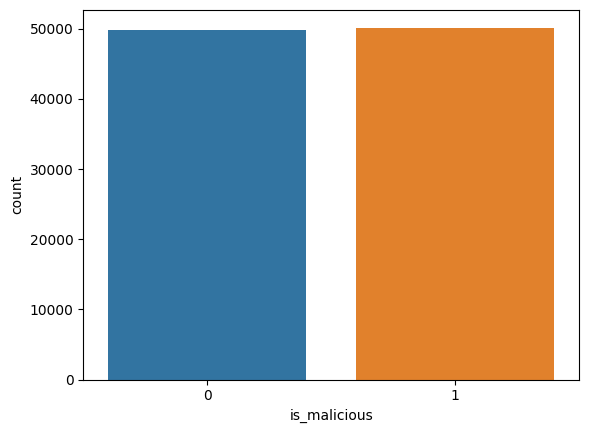

In [29]:
import seaborn as sns

sns.countplot(x='is_malicious', data=data)

In [30]:
data.to_csv('../Data/balanced_data.csv', index=False)